# 3. Machine Learning for Classification

## 3.1 Churn prediction project 

The project we're working at this time is churn prediction (at a telecom company). Let's assume a telecom company and many clients who are using it's services. Some of them are happy with the services, some of them are not. So they're think of stopping the contract and leaving to some other company.

What we want to do here. We want to identify that clients that are willing to churn (= stopping using this services)
How could we do this. We give every customer a score between 0 and 1 that tells how likely this customer is going to leave.

Then we can send promotional e-mails to this customers - giving some discount to keep this customer.

The way we approach this with ML is BINARY CLASSIFICATION

Remember the formula for one single observation:     g(xi) ~ yi

In this particular case we're dealing with our target variable yi (tells us whether customer xi left us or not) and xi that is a feature vector that is describing the ith customer.

Output of our model is yi € {0, 1} which is the likelihood that this particular customer number i is going to churn.    
1 means positive example, customer left the company, 0 means negative example, customer didn't left the company

So 1 means that there is something present (the effect we want to predict is present) and 0 means that it's not present.

The way we do this is, let's say we take the customers from last month and for each customer we know who actually left. For that customers we can set the target label to 1, for the rest we can set 0, because they stayed. All target labels together becomes the y. The information (demographic, where do they live, how much they pay, what kind of services they have, kind of contract) that we have about the customers becomes the X.

So we want to get information to determine which things lead to churn. That's the main idea of this project.We want to build a model using the historical data (with existing customers, that we can score)

For that we use a dataset from kaggle (Telco Customer Churn - Focused customer retention programs). The column we want to predict is the "Churn" column.

## 3.2 Data preparation 

- Download the data, read it with Pandas
--> Data from https://www.kaggle.com/blastchar/telco-customer-churn
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
data = "https://..."
# ! means we're executing a shell command
# $data is the way in Jupyter notbook to refer to data in this shell command
!wget $data -O data-week-3.csv

In [3]:
df = pd.read_csv('data-week-3.csv')
df.head()
# This time we see a lot of columns here - 21 columns !
# There are ... so not all of them are displayed

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# to display all of them at the same time, we can use the transpose function
# now rows become columns and columns become rows
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


What we can see here, data is not consistent / not uniform. So we do the same as we did before in the car price prediction.

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


Now all the column names are uniform and all spaces are replaced with underscores. Next look at the data types that we have.

In [8]:
df.dtypes
# we see a few interesting things here.
# seniorcitizen is a number (0 or 1) and not a string (not yes or no)
# totalcharges is an object, but should be a number

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
# really looks like a number
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [11]:
# For some reason some of the values are not numbers.
# Try to convert this to a number
pd.to_numeric(df.totalcharges)
# Output: ValueError: Unable to parse string "_" at position 488
# That means that column doesn't just contain numbers but also sth like '_', that is not a number.
# The reason for that is in this dataset space means not available, so the data is missing.
# We replaced this space with an underscore

ValueError: Unable to parse string "_" at position 488

In [18]:
# We can help Pandas. If Pandas don't know how to parse this string just ignore it and 
# replace it with NaN (Not a number)
# There is a parameter called errors and coerce means ignore them
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [15]:
# tc means total changes
tc.isnull().sum()

11

In [17]:
df[tc.isnull()]
# it's not easy to see so we need a different one
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


Now let's take of that values

In [19]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [22]:
# fill them with 0, but remember the value 0 is not always the best one, but often in practice it's ok.
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

0

Last thing what we wanted to do is looking at the churn variable.

In [25]:
df.churn.head()
# We see the values are yes or no. In ML for classification we are interested in numbers.
# 1 = churn, 0 = not churn

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [28]:
# Replacing the yes values with 1 and no values with 0
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [29]:
# Do it for all values in this column and write it back to df.churn
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## 3.3 Setting up the validation framework 

- Perform the train/validation/test split with Scikit-Learn

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# to see the documentation
train_test_split?

In [33]:
# train_test_split function splits the dataframe into two parts (full train 80% and test 20%)
# random_state=1 to make sure that the results are reproducible
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

In [34]:
# to get three sets we need to do this split again with full train set
# but be careful now we want to split our remaining 80% in 60% for train and 20% for val
# so we cannot go with test_size=0.2, we need to know how much is 20% of 80% (20/80) --> 1/4 --> 25%
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(4225, 1409)

In [35]:
# We see that validation and test set have the same size
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [38]:
# to reset the shuffled index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
# Now we need to get our y variables
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [40]:
# deleting churn from dataframes
# remember we're doing this to avoid accidentially using this variable when building a model
del df_train['churn']
del df_val['churn']
del df_test['churn'] 

## 3.4 EDA 

- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [42]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


### Check missing values

In [43]:
# we see that there are no missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### Look at the target variable (churn)

In [44]:
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int64

First what we can check is the distribution of our target variable. How many customers are churning and how many are not-churning ones.

In [45]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [46]:
df_full_train.churn.value_counts(normalize=True)
# What we see here is a CHURN RATE of 27% (rate at which customers churn)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [49]:
# calculate the mean
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

We realize that's the same value than the churn rate. Let's look why this is working here.
Formula for mean is (1/n)SUM(x)  In this case here x€{0,1} 
That means in this case we have mean = (# of ones)/n
And that is actually the churn rate.
This works for all binary datasets.

### Look at numerical and categorical variables 

In [50]:
# To see which categorical/numerical variables we have.
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

There are three numerical variables: tenure, monthlycharges, totalcharges

In [52]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [51]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [53]:
# Removing 'customerid', 'tenure', 'monthlycharges', 'totalcharges', and 'churn'
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [54]:
# Get number of unique values for all the categorical variables
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable
- Churn rate
- Risk ratio
- Mutual information - later

### Churn rate 

Last time we looked at the global churn rate. Now we look at churn rate within different groups. For example what's the churn rate for the gender group.

In [58]:
# Selecting the subset of female customers
df_full_train[df_full_train.gender == 'female']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
5,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
9,1732-vhubq,female,1,yes,yes,47,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,no,bank_transfer_(automatic),70.55,3309.25,1
11,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
13,1374-dmzui,female,1,no,no,4,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,94.30,424.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,8065-ykxkd,female,0,no,no,10,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.75,799.65,1
5619,5627-tvbpp,female,0,no,yes,35,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,credit_card_(automatic),20.10,644.50,0
5626,3262-eidhv,female,0,yes,yes,72,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,credit_card_(automatic),84.70,5893.90,0
5627,7446-sfaoa,female,0,yes,no,37,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,717.50,0


In [61]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [59]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [69]:
global_churn - churn_female

-0.006855983216553063

In [60]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [70]:
global_churn - churn_male

0.006754520462819769

Let's check the churn rate of another group.

In [62]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [66]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner
# 20.5% that looks significantly less than the global churn rate

0.20503330866025166

In [67]:
global_churn - churn_partner

0.06493474245795922

In [64]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [68]:
global_churn - churn_no_partner

-0.05984095297455855

This gives us some idea that the partner variable is more important for predicting churn than the gender variable.

### Risk ratio 

In [71]:
churn_no_partner / global_churn
# This shows that the churn rate for people without partners is 22% higher
# and for people with partner 24% lower than the global churn rate

1.2216593879412643

In [72]:
churn_partner / global_churn

0.7594724924338315

Let's take the data and group is by gender and for each variable of gender let's calculate the average churn rate within this group and calculate diff and risk.
We can do this for all the variables not only for gender variable.

SELECT

    gender,
    AVG(churn),   
    AVG(churn) - global_churn AS diff,  
    AVG(churn) / global_churn AS risk   
FROM

    date    
GROUP BY

    gender;    

In [74]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [76]:
# agg takes a list of different aggregations
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [77]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [ ]:
from IPython.display import display

In [80]:
# Now let's do this for all of the categorical columns:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


We see some categories in which people tend to churn more or less often compared to global average. This is the kind of variables we actually want to see and want to use in ML algorithms. It's nice to see this for individual variables in each table but it would be nice to have a number that describes the importance of the variable overall.
So how can we say that contract is less or more important than streamingmovies.
This is what we will do next.

## 3.6 Feature importance: Mutual information 

Remember the risk ratio is a way to measure the importance of different categorical variables. It applies to each value within a variable. For example we have the variable contract, that have the values month-to-month, one_year, and two_years. What we can see here is that people with month-to-month contract are more likely to churn than people who have two_years contract. That tells us that probably contract variable is important, but we have no way to compare this importance with other variables.

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another
- https://en.wikipedia.org/wiki/Mutual_information

So this is a way to measure the importance of categorical variables.
The intuition is: The higher the mutual information is the more we learn about the churn by observing the value of another variable.

In [81]:
from sklearn.metrics import mutual_info_score

In [83]:
# Intuition: How much do we learn about churn by observing the value of the contract variable  (and vice verca)
# one argument is the label we're interested in
# another argument is another variable (feature)
mutual_info_score(df_full_train.churn, df_full_train.contract)
# order is not important
#mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [84]:
# gender is super not informative
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [85]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

At all we can learn about the relative importance of the features. What we can do now, we can apply this metric to all the categorical variables and see which one has the highest mutual information.

In [86]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [89]:
# apply takes in a function with one argument but mutual_info_score has two arguments, so we need to implement the
# mutual_info_churn_score function
# This function we can apply at the dataframe, so it will apply this funtion column wise
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [91]:
# to order this list that the most important ones come first
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

With the help of that we understand which variables are very useful for us and which are less useful.

## 3.7 Feature importance: Correlation 

How about numerical columns? How to measure the feature importance for numerical variables?
- Correlation coefficient (Pearson's correlation)
  https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
  It measures the degree of dependency between two variables
  
The Correlation coefficient r is a value      -1 <= r <= 1

neg. correlation (r =-1) between x and y means  x grows but y decreases

pos. correlation (r = 1) between x and y means  x grows and y grows as well

0.0 < r < -0.2          -0.2 < r < -0.5          -0.6 < r < -1.0

0.0 < r <  0.2           0.2 < r <  0.5           0.6 < r <  1.0

Low correlation       moderate correlation      strong correlation

Example:

y € {0,1} x € R (-inf < x < inf)

x tenure 0-72
y churn  {0,1}

    Positive Correlation: the more tenure the higher the churn value
    Negative Correlation: the more tenure the lower the churn value
    Zero:                 no effect on churn

In [92]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [93]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [102]:
# if you're only interested in the importance not in the direction
# we can use absolute values
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [95]:
# Let't check that on people who are customers only since 2 months or less and look at the churn rate
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [96]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

In [97]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [98]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [99]:
# second example
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [100]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [101]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## 3.8 One-hot encoding 

- Use Scikit-Learn to encode categorical features

In [104]:
from sklearn.feature_extraction import DictVectorizer

In [117]:
# turns each column into a dictionary --> not what we want here
# df_train[['gender', 'contract']].iloc[:100].to_dict()

# Turn the dataframe into a bunch of dictionaries
# turns each row/record into a dictionary 
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [110]:
# first we create a new instance of this class
dv = DictVectorizer()

In [112]:
# train our dict vectorizer
# this means we show how the data looks like
# dict vectorizer infers what are the column names, what are the variable names and the values
# based on that it creates this one-hot encoding feature matrix
# !!! DictVectorizer is smart enough to detect numerical variables and ignores them !!!
# (after that we turn the dictionary into a vector)
dv.fit(dicts)

DictVectorizer()

In [113]:
# here it creates a sparse matrix
# a sparse matrix is a special way of encoding data when there are lots of zeros
dv.transform(dicts)

<10x4 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [118]:
# But we'll not use sparse matrix here
dv = DictVectorizer(sparse=False)

In [119]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [122]:
# dv.get_feature_names() --> is not working like in the video
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [120]:
# this now returns a usual NumPy array
# first 3 columns are for contract and last 2 for gender
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [123]:
# Let's bring it all together
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [124]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [125]:
dv = DictVectorizer(sparse=False)

In [126]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [127]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [132]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [133]:
# Just short
from sklearn.feature_extraction import DictVectorizer

In [134]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)

In [136]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
X_train.shape

(4225, 45)

In [135]:
# dv.fit(train_dicts)
# X_train = dv.transform(train_dicts)
# these 3 lines are the same like the following one
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [137]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
# here we only use transform
X_val = dv.transform(val_dicts)

## 3.9 Logistic Regression

- Binary classification
- Linear vs. logistic regression

In [138]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [142]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [143]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

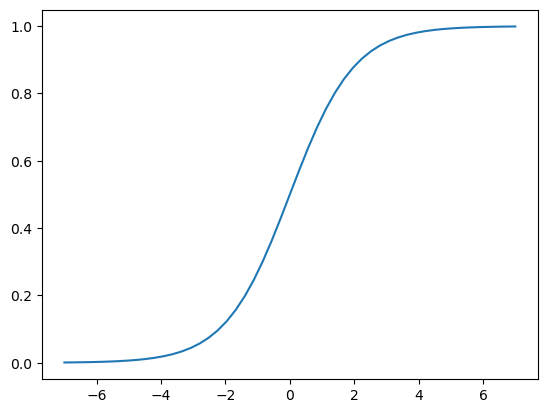

In [144]:
plt.plot(z, sigmoid(z))

In [145]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    return result

In [146]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn 

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [156]:
# shows the weights
model.coef_

array([[ 4.74725393e-01, -1.74869739e-01, -4.07533674e-01,
        -2.96832307e-02, -7.79947901e-02,  6.26830488e-02,
        -8.89697670e-02, -8.13913026e-02, -3.43104989e-02,
        -7.33675219e-02, -3.35206588e-01,  3.16498334e-01,
        -8.89697670e-02,  3.67393252e-03, -2.58133752e-01,
         1.41436648e-01,  9.01908316e-03,  6.25300062e-02,
        -8.89697670e-02, -8.12382600e-02,  2.65582755e-01,
        -8.89697670e-02, -2.84291008e-01, -2.31202837e-01,
         1.23524816e-01, -1.66018462e-01,  5.83404413e-02,
        -8.70075565e-02, -3.20578701e-02,  7.04875625e-02,
        -5.91001566e-02,  1.41436648e-01, -2.49114669e-01,
         2.15471208e-01, -1.20363620e-01, -8.89697670e-02,
         1.01655367e-01, -7.08936452e-02, -8.89697670e-02,
         5.21853914e-02,  2.13378878e-01, -8.89697670e-02,
        -2.32087131e-01, -7.04067163e-02,  3.82395921e-04]])

In [155]:
# shows the bias term
model.intercept_

array([-0.10903301])

In [157]:
# actually it's an array with one element
model.intercept_[0]

-0.10903300803603666

In [153]:
# we see it's a 2-dimensional array with just one row
# we're interested in the w
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [158]:
# we see the model predicts zeros (not churn) and ones (churn)
# This is called HARD PREDICTIONS, because we already have the exact label
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [159]:
# to learn the probability we use
# This is called SOFT PREDICTIONS
model.predict_proba(X_train)

array([[0.90451975, 0.09548025],
       [0.32068109, 0.67931891],
       [0.36632967, 0.63367033],
       ...,
       [0.46839952, 0.53160048],
       [0.95745572, 0.04254428],
       [0.30127894, 0.69872106]])

But there is an interesting thing, there are two columns. Why there are ?
The first column is the probability of being negative class (0), and the second is the probability of belonging to positive class (1). So actually we're interested in the second column - the probabilty of churning.

In [163]:
# therefor we can just take the second column
# This is soft prediction. Now we can use this to decide above which threshold we treat people as churning.
# So we have to make the final decision.
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899701, 0.20452226, 0.21222307, ..., 0.13638772, 0.79975934,
       0.83739781])

In [166]:
# We get a binary array with predictions
churn_decision = y_pred >0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [167]:
# Selecting all the customers that we think are going to churn
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [169]:
# That are the people that will receive a promotional email with some discount
# The way this is working here is it selects all the rows for which this churn_decision is true.
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [ ]:
# Let's see how accurate our predictions are.
# This time we use accuracy instead of rmse

In [170]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [172]:
churn_decision
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [174]:
# We can check how many of our predictions match the actual y_val values
# This is a shortcut for the way that is shown below (shows the fractions of trues/ones in this array)
(y_val == churn_decision).mean()

0.8034066713981547

In [177]:
# Let's see how the last line is working inside.
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204522,0,0,True
2,0.212223,0,0,True
3,0.543039,1,1,True
4,0.213786,0,0,True
...,...,...,...,...
1404,0.313668,0,0,True
1405,0.039359,0,1,False
1406,0.136388,0,0,True
1407,0.799759,1,1,True


In [178]:
# Remember it's a binary array, therfor mean calculates the fractions of ones there
# Because it's a boolean array instead of 1-0 array, true turns into 1 and false turns into 0
# That means that happens automatically
df_pred.correct.mean()

0.8034066713981547

We see our model has an accuracy of 80%, so it's correct in 80% of the cases

## 3.11 Model interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [180]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [179]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [188]:
a = [1, 2, 3, 4]
b = 'abcd'
# zip creates a tuple
# for each element of a it joins with an element of b at the same position 
# (first element of a with first element of b, etc.)
# we need to put it in a list to see the result
list(zip(a, b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [195]:
a = [1, 2, 3, 4]
b = 'abcd'
dict(zip(a, b))
# Output should be: {1: 'a', 2: 'b', 3: 'c', 4: 'd'}
# The elements from list a become keys and the elements from list b become the values

TypeError: 'list' object is not callable

In [213]:
!python -V

Python 3.9.17


In [183]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('contract=month-to-month', 0.475),
 ('contract=one_year', -0.175),
 ('contract=two_year', -0.408),
 ('dependents=no', -0.03),
 ('dependents=yes', -0.078),
 ('deviceprotection=no', 0.063),
 ('deviceprotection=no_internet_service', -0.089),
 ('deviceprotection=yes', -0.081),
 ('gender=female', -0.034),
 ('gender=male', -0.073),
 ('internetservice=dsl', -0.335),
 ('internetservice=fiber_optic', 0.316),
 ('internetservice=no', -0.089),
 ('monthlycharges', 0.004),
 ('multiplelines=no', -0.258),
 ('multiplelines=no_phone_service', 0.141),
 ('multiplelines=yes', 0.009),
 ('onlinebackup=no', 0.063),
 ('onlinebackup=no_internet_service', -0.089),
 ('onlinebackup=yes', -0.081),
 ('onlinesecurity=no', 0.266),
 ('onlinesecurity=no_internet_service', -0.089),
 ('onlinesecurity=yes', -0.284),
 ('paperlessbilling=no', -0.231),
 ('paperlessbilling=yes', 0.124),
 ('partner=no', -0.166),
 ('partner=yes', 0.058),
 ('paymentmethod=bank_transfer_(automatic)', -0.087),
 ('paymentmethod=credit_card_(automa

In [196]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

TypeError: 'list' object is not callable

In [197]:
# let's take a subset of features to train a model
small = ['contract', 'tenure', 'monthlycharges']

In [199]:
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [200]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [201]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [202]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [203]:
# three binary features for the contract variable and two numerical features for monthlycharges and tenure
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [205]:
X_train_small = dv_small.transform(dicts_train_small)
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [209]:
w0 = model_small.intercept_[0]
w0

-2.476775661122344

In [211]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [212]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

# Output:
# {'contract=month-to-month': 0.97,
#  'contract=one-year': -0.025,
#  'contract=two_year': -0.949,
#  'monthlycharges': 0.027,
#  'tenure': -0.036}

TypeError: 'list' object is not callable

In [214]:
sigmoid(-2.47)

0.07798823512936635

In [215]:
sigmoid(-2.47+0.97)

0.18242552380635632

In [216]:
sigmoid(-2.47 + 0.97 + 50*0.027)

0.46257015465625034

In [217]:
sigmoid(-2.47 + 0.97 + 50*0.027 + 5*(-0.036))

0.41824062315816374

In [218]:
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

-0.3300000000000001

In [219]:
# '_' is a magic variable in Jupyter and means take the output of the last cell
sigmoid(_)

0.41824062315816374

We see for this customer the probability of churning is 41.8%

Let's look at another example, where the result is >0, that means this customer is more likely to churn.
Remember we know sigmoid(0) = 0.5 --> 50% likelyhood of churning
--> We would treat this customer already as churning

In [221]:
-2.47 + 0.97 + 60*0.027 + 1*(-0.036)

0.08399999999999966

In [222]:
sigmoid(_)

0.5209876607065322

In [223]:
# last example
-2.47 + (-0.949) + 30*0.027 + 24*(-0.036)

-3.473

In [224]:
sigmoid(_)

0.030090303318277657

The probability of this customer is churning is very low

## 3.12 Using the model 

- train a model on full_train dataset

In [225]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [226]:
# first we need to get the dictionaries
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [227]:
# create DictVectorizer
dv = DictVectorizer(sparse=False)

In [228]:
# from this dictionaries we get the feature matrix
X_full_train = dv.fit_transform(dicts_full_train)

In [229]:
# then we train a model on this feature matrix
y_full_train = df_full_train.churn.values
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [230]:
# do the same things for test data
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [233]:
# do the predictions
y_pred = model.predict_proba(X_test)[:, 1]

In [234]:
# compute accuracy
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

0.815471965933286

Accuracy of 81.5% is slightly more accurate than what we had in the validation data. Little differences are ok but we want to avoid big differences. Big difference means that we have a problem.

Using the model
We wanted to use this model for a customer to know if this customer wants to leave or not. In case that this customer is going to leave we want to send this customer a promotional email.

Let's imagine we have a website with the model and we have the customer with information, that get transfered as dictionary over the network. Then the model computes something and returns the probability.

In [236]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [238]:
# Now we want to get the feature matrix for this requested customer (as dictionary)
# for the DictVectorizer we need a list with just one customer
X_small = dv.transform([customer])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [240]:
# one customer with 45 features
X_small.shape

(1, 45)

In [242]:
# We see this customer has a probability of only 40% of churning
# --> We assume this customer is not going to churn
model.predict_proba(X_small)
model.predict_proba(X_small)[0,1]

0.4056810977975889

In [243]:
# Let's check the actuel value...
y_test[10]
# Our decision not sending an email to this customer was correct.

0

In [244]:
# Let's test one customer that is going to churn
customer = dicts_test[-1]
X_small = dv.transform([customer])
model.predict_proba(X_small)[0,1]

0.5968852088398422

In [245]:
# Let's check the actuel value...
y_test[-1]

1

## 3.13 Summary 

## 3.14 Explore more